# **1. Import Library**

Pada tahap ini, beberapa pustaka (library) Python yang dibutuhkan diimport untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.decomposition import PCA

# **2. Memuat Dataset dari Hasil Clustering**

Dalam tahap ini dataset "data_hasil_clustering.csv" dimuat dari Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = '/content/drive/MyDrive/IDCAMP/Proyek_Akhir_BMLP_Navy/data_hasil_clustering.csv'
df = pd.read_csv(file_path)
df.head()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases,Cluster
0,0.718913,-0.685994,-1.394144,-0.002002,-0.285629,-0.576399,0.771136,-0.707620,1.343515,-0.907584,1.644294,-0.295206,-0.892178,1.151339,1.151339,-0.785831,1.471636,0.012575,5
1,-1.648629,-0.685994,1.523236,-0.002002,0.178852,-0.436944,0.771136,-0.015163,1.343515,-0.907584,1.644294,-1.472409,-0.892178,1.151339,1.151339,-1.616552,-0.894631,0.012575,5
2,0.390088,-0.685994,-0.143839,-0.002002,0.558882,-0.297488,-1.496910,-0.015163,-1.328897,-0.907584,1.644294,-0.883807,-0.303032,1.151339,1.151339,-0.162789,-0.303064,1.513849,2
3,-1.517099,-0.685994,0.272930,1.113356,1.276716,0.957614,-0.362887,-0.015163,-1.328897,-0.349027,1.644294,0.881996,0.286113,1.151339,1.151339,1.637107,0.880069,1.513849,2
4,0.061263,-0.685994,-1.394144,-0.002002,-0.454531,0.818159,-0.362887,1.231259,-1.328897,-1.466141,1.644294,-0.883807,-0.303032,1.151339,1.151339,0.391025,0.880069,-1.488699,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       3900 non-null   float64
 1   Gender                    3900 non-null   float64
 2   Item Purchased            3900 non-null   float64
 3   Category                  3900 non-null   float64
 4   Purchase Amount (USD)     3900 non-null   float64
 5   Location                  3900 non-null   float64
 6   Size                      3900 non-null   float64
 7   Color                     3900 non-null   float64
 8   Season                    3900 non-null   float64
 9   Review Rating             3900 non-null   float64
 10  Subscription Status       3900 non-null   float64
 11  Payment Method            3900 non-null   float64
 12  Shipping Type             3900 non-null   float64
 13  Discount Applied          3900 non-null   float64
 14  Promo Co

In [5]:
df.describe()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases,Cluster
count,3.900000e+03,3900.000000,3.900000e+03,3.900000e+03,3.900000e+03,3.900000e+03,3.900000e+03,3.900000e+03,3.900000e+03,3.900000e+03,3.900000e+03,3.900000e+03,3.900000e+03,3900.000000,3900.000000,3.900000e+03,3.900000e+03,3.900000e+03,3900.000000
mean,-1.926664e-16,0.000000,7.014332e-17,1.703481e-16,-1.220676e-16,-3.734904e-17,-3.552714e-17,-1.120471e-16,2.368476e-17,4.313359e-16,5.830094e-17,-1.097697e-16,-1.056705e-16,0.000000,0.000000,7.287618e-17,-5.465713e-17,-6.194475e-17,3.431282
std,1.000128e+00,1.000128,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128e+00,1.000128,1.000128,1.000128e+00,1.000128e+00,1.000128e+00,2.324010
min,-1.714394e+00,-0.685994,-1.671990e+00,-1.117360e+00,-1.679071e+00,-1.692046e+00,-1.496910e+00,-1.677060e+00,-1.328897e+00,-1.745419e+00,-6.081636e-01,-1.472409e+00,-1.481324e+00,-0.868554,-0.868554,-1.685779e+00,-1.486198e+00,-1.488699e+00,0.000000
25%,-8.594483e-01,-0.685994,-8.384529e-01,-1.117360e+00,-8.767861e-01,-8.553111e-01,-3.628874e-01,-8.461114e-01,-1.328897e+00,-9.075836e-01,-6.081636e-01,-8.838074e-01,-8.921780e-01,-0.868554,-0.868554,-8.550575e-01,-8.946310e-01,-9.882745e-01,1.000000
50%,-4.502378e-03,-0.685994,-4.915732e-03,-2.001925e-03,9.950067e-03,-1.857623e-02,-3.628874e-01,-1.516303e-02,-4.380928e-01,-6.974802e-02,-6.081636e-01,-2.952061e-01,2.861133e-01,-0.868554,-0.868554,-2.433588e-02,-3.030642e-01,1.257477e-02,3.000000
75%,8.504436e-01,1.457738,8.286215e-01,-2.001925e-03,8.966862e-01,8.181586e-01,7.711357e-01,8.157853e-01,4.527111e-01,9.077268e-01,1.644294e+00,8.819963e-01,8.752589e-01,1.151339,1.151339,8.756125e-01,8.800693e-01,1.013424e+00,5.000000
max,1.705390e+00,1.457738,1.662159e+00,2.228715e+00,1.698971e+00,1.724621e+00,1.905159e+00,1.646734e+00,1.343515e+00,1.745562e+00,1.644294e+00,1.470597e+00,1.464405e+00,1.151339,1.151339,1.706334e+00,1.471636e+00,1.513849e+00,8.000000


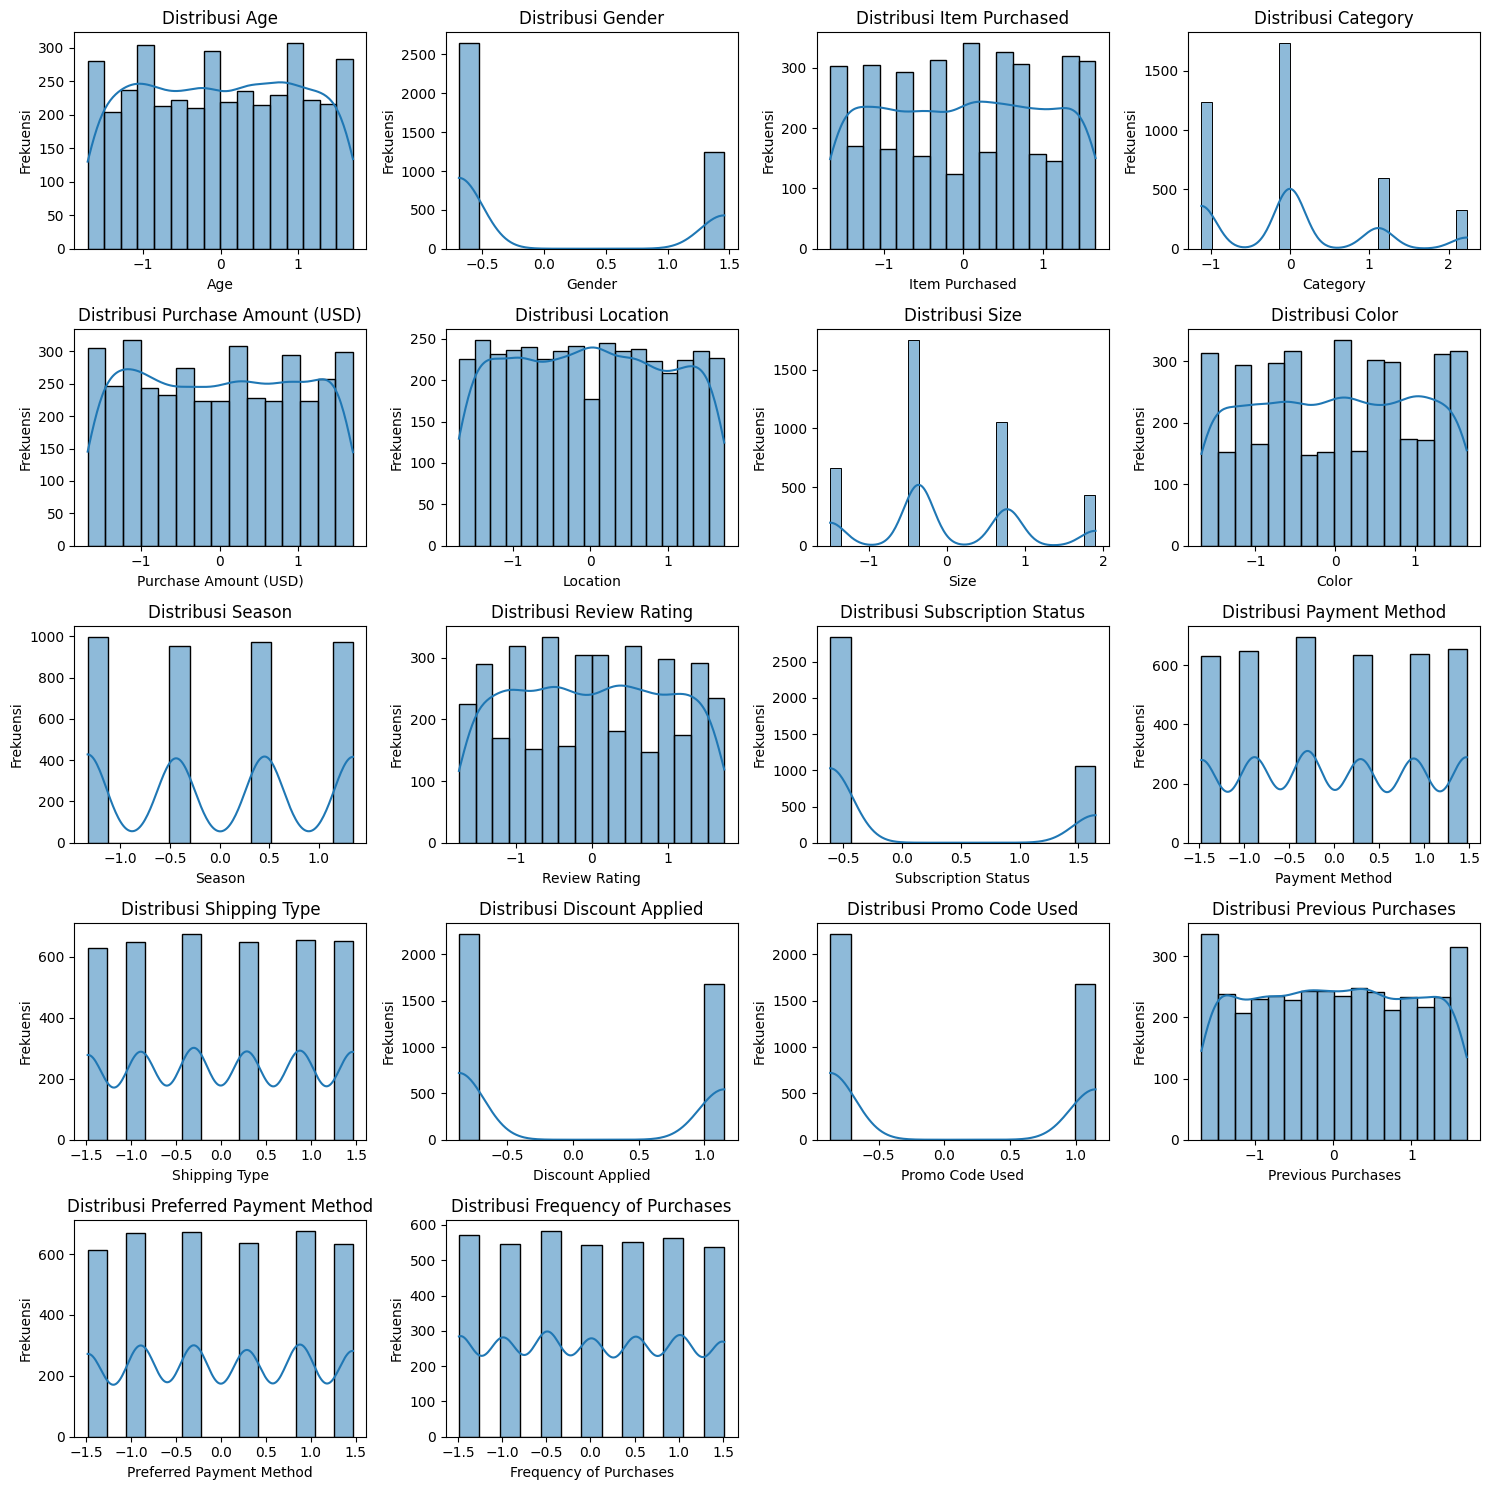

In [6]:
# Menampilkan distribusi untuk setiap fitur (kecuali target 'Cluster')
features = df.drop(columns=['Cluster'])
num_features = len(features.columns)
num_cols = 4
num_rows = (num_features + num_cols - 1) // num_cols

plt.figure(figsize=(15, 15))
for i, feature in enumerate(features.columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribusi {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set). Dalh project ini rasio pembagiannya adalh 80% data latih dan 20% data uji

In [7]:
X = df.drop(columns=['Cluster'])  # Kolom Fitur
y = df['Cluster']  # Kolom Target/Label Cluster
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Ukuran data latih: {X_train.shape[0]} baris')
print(f'Ukuran data uji: {X_test.shape[0]} baris')

Ukuran data latih: 3120 baris
Ukuran data uji: 780 baris


In [8]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3120 entries, 247 to 3174
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       3120 non-null   float64
 1   Gender                    3120 non-null   float64
 2   Item Purchased            3120 non-null   float64
 3   Category                  3120 non-null   float64
 4   Purchase Amount (USD)     3120 non-null   float64
 5   Location                  3120 non-null   float64
 6   Size                      3120 non-null   float64
 7   Color                     3120 non-null   float64
 8   Season                    3120 non-null   float64
 9   Review Rating             3120 non-null   float64
 10  Subscription Status       3120 non-null   float64
 11  Payment Method            3120 non-null   float64
 12  Shipping Type             3120 non-null   float64
 13  Discount Applied          3120 non-null   float64
 14  Promo Code 

In [9]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 780 entries, 839 to 805
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       780 non-null    float64
 1   Gender                    780 non-null    float64
 2   Item Purchased            780 non-null    float64
 3   Category                  780 non-null    float64
 4   Purchase Amount (USD)     780 non-null    float64
 5   Location                  780 non-null    float64
 6   Size                      780 non-null    float64
 7   Color                     780 non-null    float64
 8   Season                    780 non-null    float64
 9   Review Rating             780 non-null    float64
 10  Subscription Status       780 non-null    float64
 11  Payment Method            780 non-null    float64
 12  Shipping Type             780 non-null    float64
 13  Discount Applied          780 non-null    float64
 14  Promo Code Us

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [10]:
# Support Vector Machine (SVM)
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

# K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

Dalam project ini, beberapa model klasifikasi dibangun untuk dibandingkan kinerjanya dalam memprediksi cluster pelanggan. Algoritma klasifikasi yang digunkana adalah:
- Support Vector Machine (SVM)
- K-Nearest Neighbors (KNN)
- Random Forest
- Decision Tree

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih (X_train).

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

Setelah model dilatih, tahap selanjutnya adalah mengevaluasi performa masing-masing model dengan menggunakan metrik seperti Accuracy, Precision, Recall, dan F1 Score. Hasil evaluasi ini digunakan untuk membandingkan performa model dan menentukan model terbaik. Selain itu juga dilakukan visualisasi Confusion Matrix untuk masing masing model.

### Evaluasi Model - Support Vector Machine (SVM)

In [11]:
# Evaluasi model SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

print(f"SVM - Accuracy: {accuracy_svm:.4f}")
print(f"SVM - Precision: {precision_svm:.4f}")
print(f"SVM - Recall: {recall_svm:.4f}")
print(f"SVM - F1 Score: {f1_svm:.4f}")

SVM - Accuracy: 1.0000
SVM - Precision: 1.0000
SVM - Recall: 1.0000
SVM - F1 Score: 1.0000


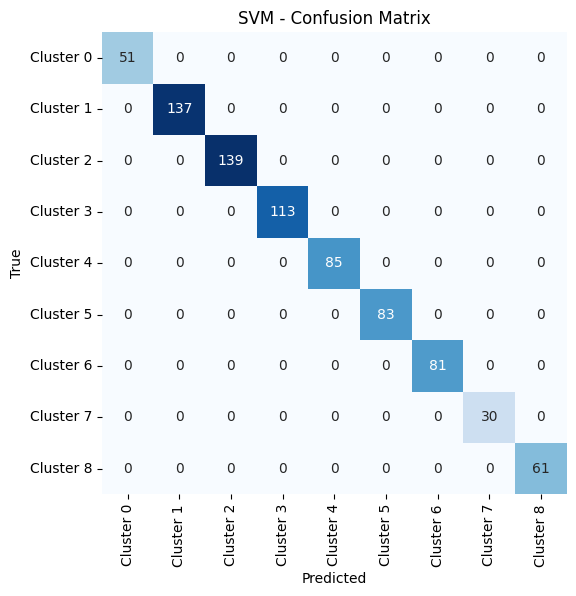

In [12]:
# Confusion Matrix untuk SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(6, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=[f"Cluster {i}" for i in range(len(cm_svm))], yticklabels=[f"Cluster {i}" for i in range(len(cm_svm))])
plt.title("SVM - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

### Evaluasi Model - Random Forest

In [13]:
# Evaluasi model Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

print(f"Random Forest - Accuracy: {accuracy_rf:.4f}")
print(f"Random Forest - Precision: {precision_rf:.4f}")
print(f"Random Forest - Recall: {recall_rf:.4f}")
print(f"Random Forest - F1 Score: {f1_rf:.4f}")

Random Forest - Accuracy: 1.0000
Random Forest - Precision: 1.0000
Random Forest - Recall: 1.0000
Random Forest - F1 Score: 1.0000


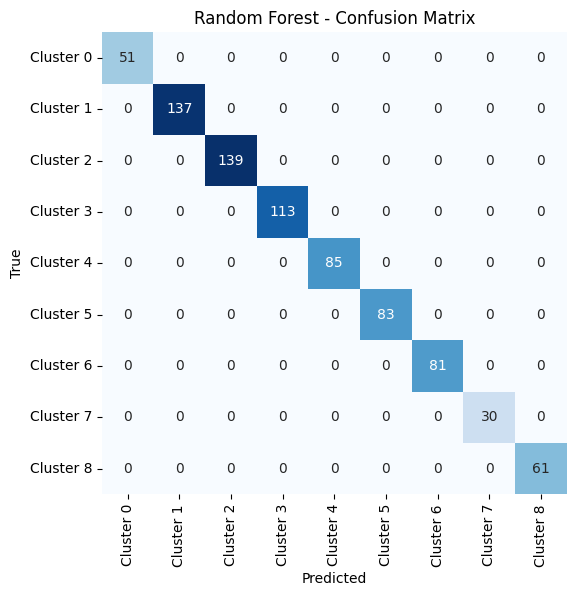

In [14]:
# Confusion Matrix untuk Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=[f"Cluster {i}" for i in range(len(cm_rf))], yticklabels=[f"Cluster {i}" for i in range(len(cm_rf))])
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


### Evaluasi Model - K-Nearest Neighbors (KNN)

In [15]:
# Evaluasi model KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')

print(f"KNN - Accuracy: {accuracy_knn:.4f}")
print(f"KNN - Precision: {precision_knn:.4f}")
print(f"KNN - Recall: {recall_knn:.4f}")
print(f"KNN - F1 Score: {f1_knn:.4f}")

KNN - Accuracy: 0.8141
KNN - Precision: 0.8071
KNN - Recall: 0.8141
KNN - F1 Score: 0.8018


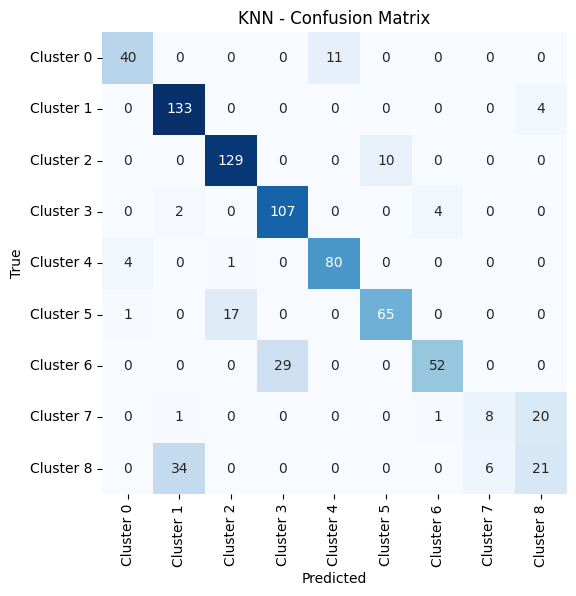

In [16]:
# Confusion Matrix untuk KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(6, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=[f"Cluster {i}" for i in range(len(cm_knn))], yticklabels=[f"Cluster {i}" for i in range(len(cm_knn))])
plt.title("KNN - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

### Evaluasi Model - Decision Tree

In [17]:
# Evaluasi model Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')

print(f"Decision Tree - Accuracy: {accuracy_dt:.4f}")
print(f"Decision Tree - Precision: {precision_dt:.4f}")
print(f"Decision Tree - Recall: {recall_dt:.4f}")
print(f"Decision Tree - F1 Score: {f1_dt:.4f}")

Decision Tree - Accuracy: 1.0000
Decision Tree - Precision: 1.0000
Decision Tree - Recall: 1.0000
Decision Tree - F1 Score: 1.0000


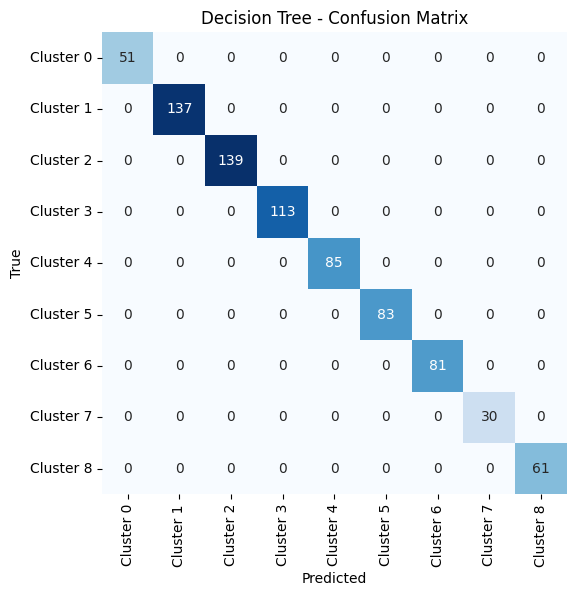

In [18]:
# Confusion Matrix untuk Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(6, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=[f"Cluster {i}" for i in range(len(cm_dt))], yticklabels=[f"Cluster {i}" for i in range(len(cm_dt))])
plt.title("Decision Tree - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


Setelah menghitung metrik dan menampilkan confusion matrix, langkah selanjutnya adalah membandingkan nilai Accuracy, Precision, Recall, dan F1 Score dari keempat model untuk menentukan model yang paling cocok.

In [20]:
# Menyusun perbandingan kinerja keempat model
model_comparison = pd.DataFrame({
    'Model': ['SVM', 'Random Forest', 'KNN', 'Decision Tree'],
    'Accuracy': [accuracy_svm, accuracy_rf, accuracy_knn, accuracy_dt],
    'Precision': [precision_svm, precision_rf, precision_knn, precision_dt],
    'Recall': [recall_svm, recall_rf, recall_knn, recall_dt],
    'F1 Score': [f1_svm, f1_rf, f1_knn, f1_dt]
})

print(model_comparison)


           Model  Accuracy  Precision    Recall  F1 Score
0            SVM  1.000000   1.000000  1.000000  1.000000
1  Random Forest  1.000000   1.000000  1.000000  1.000000
2            KNN  0.814103   0.807131  0.814103  0.801792
3  Decision Tree  1.000000   1.000000  1.000000  1.000000


Hasil evaluasi algoritma yang digunakan:
- Model SVM menunjukkan performa yang sangat baik dengan nilai accuracy, precision, recall, dan f1 score semuanya mencapai 1.0000. Hal ini menunjukkan bahwa model ini sangat akurat dalam mengklasifikasikan data uji, tanpa adanya kesalahan.
- Model Random Forest juga menunjukkan hasil yang sempurna, dengan semua metrik evaluasi mencapai 1.0000. Ini menunjukkan bahwa Random Forest berhasil memprediksi semua data uji dengan akurat, mirip dengan SVM.
- Model KNN menunjukkan performa yang jauh lebih rendah dibandingkan dengan SVM dan Random Forest. Dengan accuracy sekitar 81%, KNN tidak mampu mencapai performa sempurna pada data uji. Meskipun nilai precision dan recall relatif seimbang, hasil f1 score menunjukkan adanya ketidakseimbangan dalam performa model. Model ini mungkin lebih sensitif terhadap pengaturan parameter atau distribusi data.
- Model Decision Tree juga memberikan hasil yang sangat baik, dengan nilai metrik yang semua mencapai 1.0000. Ini menunjukkan bahwa Decision Tree berhasil mengklasifikasikan data uji dengan sangat baik, mirip dengan SVM dan Random Forest.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

1. Bandingkan Hasil Evaluasi

  Berdasarkan hasil evaluasi yang didapatkan, berikut adalah perbandingan performa masing-masing model:
  - **SVM, Random Forest, Decision Tree:**
  Ketiga model ini menunjukkan hasil accuracy, precision, recall, dan F1 score yang sempurna (1.000000), yang menunjukkan bahwa model-model ini berhasil mengklasifikasikan seluruh data dengan benar pada data uji. Hal ini dapat menunjukkan bahwa model-model ini sangat kuat pada dataset ini dan mengklasifikasikan data dengan sangat baik. Namun, hasil yang sangat sempurna ini juga dapat menandakan overfitting, yaitu model yang terlalu terlatih pada data latih dan kurang dapat menggeneralisasi pada data yang belum terlihat.

  - **KNN:**
  KNN menunjukkan accuracy yang lebih rendah (0.8141) serta nilai precision, recall, dan F1 score yang lebih rendah dibandingkan dengan model lainnya Meskipun hasil KNN masih menunjukkan performa yang cukup baik, penurunan performa dibandingkan dengan model lainnya menunjukkan bahwa KNN mungkin tidak dapat mengoptimalkan performa pada dataset ini, yang bisa disebabkan oleh hyperparameter yang tidak optimal atau sifat data yang tidak cocok dengan algoritma KNN.

  - Tidak ada indikasi underfitting pada model-model ini, karena mereka memiliki performa yang sangat baik pada data uji.

2. Identifikasi Kelemahan Model
  
  - Precision atau Recall Rendah untuk Kelas Tertentu. Pada KNN, meskipun nilai-nilai metrik masih cukup baik, ada penurunan yang signifikan dibandingkan dengan model lainnya. Nilai precision dan recall yang lebih rendah menunjukkan bahwa KNN mungkin salah mengklasifikasikan beberapa titik data, yang mengindikasikan kesalahan dalam prediksi kelas tertentu
  - Sebaliknya, SVM, Random Forest, dan Decision Tree memiliki nilai precision, recall, dan F1 score yang sangat tinggi, yang menunjukkan bahwa model-model ini mengklasifikasikan hampir semua data dengan benar. Ini bisa menandakan overfitting, yang berarti model mungkin terlalu fit dengan data latih dan kurang dapat menggeneralisasi pada data uji.

3. Rekomendasi Tindakan Lanjutan
  - KNN mungkin tidak dapat memberikan hasil optimal karena ketergantungannya pada parameter k dan karakteristik dataset. Beberapa hal seperti pencarian grid untuk menemukan nilai k yang lebih optimal, serta mencoba teknik pengukuran jarak lainnya (seperti manhattan atau cosine distance) juga dapat membantu. Selain itu, KNN bisa lebih baik jika fitur data diubah atau diperbaiki lebih lanjut (misalnya, melakukan feature selection atau dimensionality reduction seperti PCA).
  - Pengumpulan Data Tambahan. Jika hasil evaluasi masih menunjukkan adanya masalah, seperti KNN yang kurang optimal, maka salah satu cara untuk memperbaikinya adalah dengan mengumpulkan lebih banyak data untuk membantu model dalam belajar lebih baik. Jika dataset terbatas, model mungkin tidak dapat menangkap pola dengan baik.
  - Mnecoba algoritma lainnya. Jika performa model-model yang ada masih belum memadai, maka algoritma lain seperti Gradient Boosting Machines (GBM) atau XGBoost, yang sering memberikan hasil yang sangat baik pada berbagai jenis dataset.